## attempting to read in fits file

 using this website as guide https://docs.astropy.org/en/stable/io/fits/index.html
 

In [1]:
#import astropy

from astropy.io import fits

from astropy.table import Table


In [2]:
fits_NSA_file = r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdul = fits.open(fits_NSA_file) 

In [3]:
hdul.info()

Filename: C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    330   641409R x 141C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, J, E, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7B, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, I, J, D, D, E, 6A, 27A, 8A, J, D, D, E, E, E, E, E, E, E, E, 7E, 7E, 7E, 7E, E, 7E, 7E, 7E, 7E, I, 7E, 7E, 7E, 7E, 5E, E, 7E, E, E, E, D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K]   


In [4]:
data_header = hdul[1].header
data_header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4091 / length of dimension 1                          
NAXIS2  =               641409 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  141 / number of table fields                         
TTYPE1  = 'IAUNAME '                                                            
TFORM1  = '19A     '                                                            
TTYPE2  = 'SUBDIR  '                                                            
TFORM2  = '27A     '                                                            
TTYPE3  = 'RA      '        

In [5]:
data = hdul[1].data

data['ELPETRO_ABSMAG'][:,4]   #test

array([-19.303656, -19.976496, -18.431812, ..., -18.258053, -17.241238,
       -19.631086], dtype=float32)

In [6]:
data_table = Table()

data_table['RA'] = data['RA']
data_table['DEC'] = data['DEC']
data_table['Z'] = data['Z']
data_table['ELPETRO_ABSMAG_r'] = data['ELPETRO_ABSMAG'][:,4]
data_table['u_r'] = data['u_r']
data_table['sSFR'] = data['sSFR']
data_table['HImass'] = data['HImass']
data_table['flag3727'] = data['flag3727']
data_table['t3'] = data['t3']
data_table['Z12logOH'] = data['Z12logOH']
data_table['Zerr'] = data['Zerr']
data_table['logNO'] = data['logNO']
data_table['NOerr'] = data['NOerr']
data_table['vflag_VF'] = data['vFlag_VF']

In [7]:
data_table[:5]

RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF
float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
146.714215072841,-1.0412800233313741,0.021222278,-19.303656,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9
146.6285851269414,-0.7651620976591762,0.06465632,-19.976496,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2
146.63170644325592,-0.9883467023052999,0.05265425,-18.431812,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2
146.9341288729797,-0.6704053610430766,0.121270485,-21.559162,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9
146.9634997327016,-0.5447758299302171,0.055980586,-19.100992,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2


## Plotting galaxies with RA and DEC

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

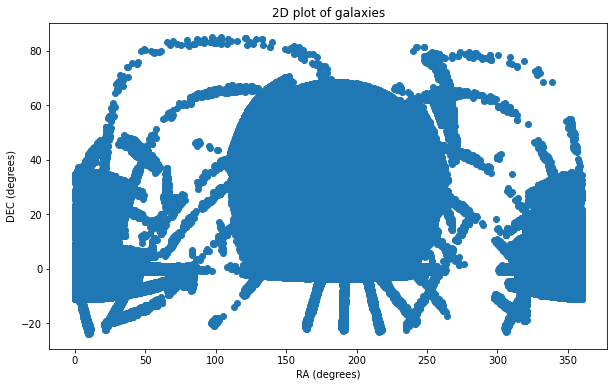

In [21]:
plt.rcParams["figure.figsize"] = (10,6)  #increase size of figure

plt.title('2D plot of galaxies') #title
plt.xlabel('RA (degrees)') #x label
plt.ylabel('DEC (degrees)') #y label

plt.scatter(data_table['RA'], data_table['DEC'])

## 3D plot attempt RA, DEC, Z

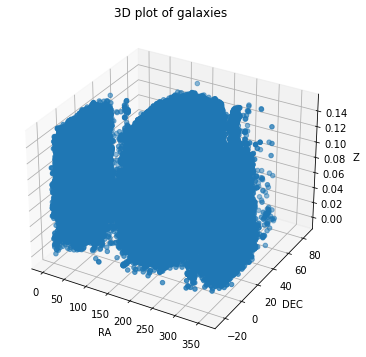

In [25]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table['RA'], data_table['DEC'], data_table['Z'])

plt.title('3D plot of galaxies')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('Z')

plt.show()

In [ ]:
#hdul.close()